# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

#### Importing the Dataset

In [ ]:
df = pd.read_csv('Data Merge.csv')

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,2,9,f,White European,no,yes,family member,Yes


# Data Pre-Processing

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,2,9,f,White European,no,yes,family member,Yes


np.random.seed(42)
rows_to_flip = np.random.choice(df.index, size=int(0.03 * len(df)), replace=False)
df.loc[rows_to_flip, 'Class'] = np.where(df.loc[rows_to_flip, 'Class'] == 'Yes', 'No', 'Yes')

In [ ]:
df['Class'].value_counts()

Yes    1335
No      843
Name: Class, dtype: int64

In [ ]:
df['Ethnicity'].value_counts()

White European    656
asian             618
middle eastern    411
south asian       205
black              88
Others             65
Hispanic           64
Latino             41
mixed               8
Pacifica            8
Mixed               5
PaciFica            5
Native Indian       4
Name: Ethnicity, dtype: int64

In [ ]:
df['Who completed the test'].value_counts()

family member               1018
Health Care Professional     692
family member                447
Others                         9
Self                           7
Health care professional       5
Name: Who completed the test, dtype: int64

In [ ]:
df_1 = df

Removing 'Case no' column

In [ ]:
# Unique values
for i in df_1.columns:
    print('*** ',i,' ==> ',df_1[i].unique())

***  A1  ==>  [0 1]
***  A2  ==>  [0 1]
***  A3  ==>  [0 1]
***  A4  ==>  [0 1]
***  A5  ==>  [0 1]
***  A6  ==>  [0 1]
***  A7  ==>  [1 0]
***  A8  ==>  [1 0]
***  A9  ==>  [0 1]
***  A10  ==>  [1 0]
***  Age_Years  ==>  [2 3 1 4 5 6 7 8 9]
***  Qchat-10-Score  ==>  [ 3  4 10  9  8  5  6  2  0  7  1]
***  Sex  ==>  ['f' 'm']
***  Ethnicity  ==>  ['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica'
 'Mixed' 'PaciFica']
***  Jaundice  ==>  ['yes' 'no']
***  Family_mem_with_ASD  ==>  ['no' 'yes']
***  Who completed the test  ==>  ['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others' 'family member ']
***  Class  ==>  ['No' 'Yes']


###  Labels Mapping

In [ ]:
df_1['Sex'] = df_1['Sex'].map({'m':1,'f':0})
df_1['Jaundice'] = df_1['Jaundice'].map({'yes':1,'no':0})
df_1['Family_mem_with_ASD'] = df_1['Family_mem_with_ASD'].map({'yes':1,'no':0})
df_1['Class'] = df_1['Class'].map({'Yes':1,'No':0})

In [ ]:
# Handling ' Ethnicity' column labels
ethnicity_mapping = {
    'Hispanic': 'Hispanic/latino',
    'Latino': 'Hispanic/latino',
    'mixed': 'Others',
    'Pacifica': 'Others',
    'Native Indian': 'Others',
    'PaciFica' : 'Others',
    'Mixed' : 'Others'
}
df_1['Ethnicity'] = df_1['Ethnicity'].replace(ethnicity_mapping)
df_1['Ethnicity'].value_counts()

White European     656
asian              618
middle eastern     411
south asian        205
Hispanic/latino    105
Others              95
black               88
Name: Ethnicity, dtype: int64

In [ ]:
# Handling ' who completed the test' column labels
df_1['Who completed the test'] = df_1['Who completed the test'].map({'family member':1,'Health Care Professional':0,'Health care professional':0,'Self':0,'Others':0,'family member ':1})

In [ ]:
df_1['Who completed the test'].value_counts()

1    1465
0     713
Name: Who completed the test, dtype: int64

#### Missing values

In [ ]:
for i in df_1:
    print(i,' ==> ',df_1[i].isnull().sum())

A1  ==>  0
A2  ==>  0
A3  ==>  0
A4  ==>  0
A5  ==>  0
A6  ==>  0
A7  ==>  0
A8  ==>  0
A9  ==>  0
A10  ==>  0
Age_Years  ==>  0
Qchat-10-Score  ==>  0
Sex  ==>  0
Ethnicity  ==>  0
Jaundice  ==>  0
Family_mem_with_ASD  ==>  0
Who completed the test  ==>  0
Class  ==>  0


# EDA

### Class priors

In [ ]:
for i in df_1.columns:
    print(df_1[i].value_counts().sort_values())
    print(' =======================================')

1     954
0    1224
Name: A1, dtype: int64
1     762
0    1416
Name: A2, dtype: int64
1     687
0    1491
Name: A3, dtype: int64
1     874
0    1304
Name: A4, dtype: int64
1     892
0    1286
Name: A5, dtype: int64
1     970
0    1208
Name: A6, dtype: int64
0    1063
1    1115
Name: A7, dtype: int64
1     785
0    1393
Name: A8, dtype: int64
1     820
0    1358
Name: A9, dtype: int64
0     963
1    1215
Name: A10, dtype: int64
6     24
4    135
5    139
8    139
1    180
9    206
7    337
2    375
3    643
Name: Age_Years, dtype: int64
0      88
10    140
9     149
8     158
2     176
4     186
5     220
7     220
1     247
3     258
6     336
Name: Qchat-10-Score, dtype: int64
0     607
1    1571
Name: Sex, dtype: int64
black               88
Others              95
Hispanic/latino    105
south asian        205
middle eastern     411
asian              618
White European     656
Name: Ethnicity, dtype: int64
0    1000
1    1178
Name: Jaundice, dtype: int64
1     541
0    1637
Name: Fam

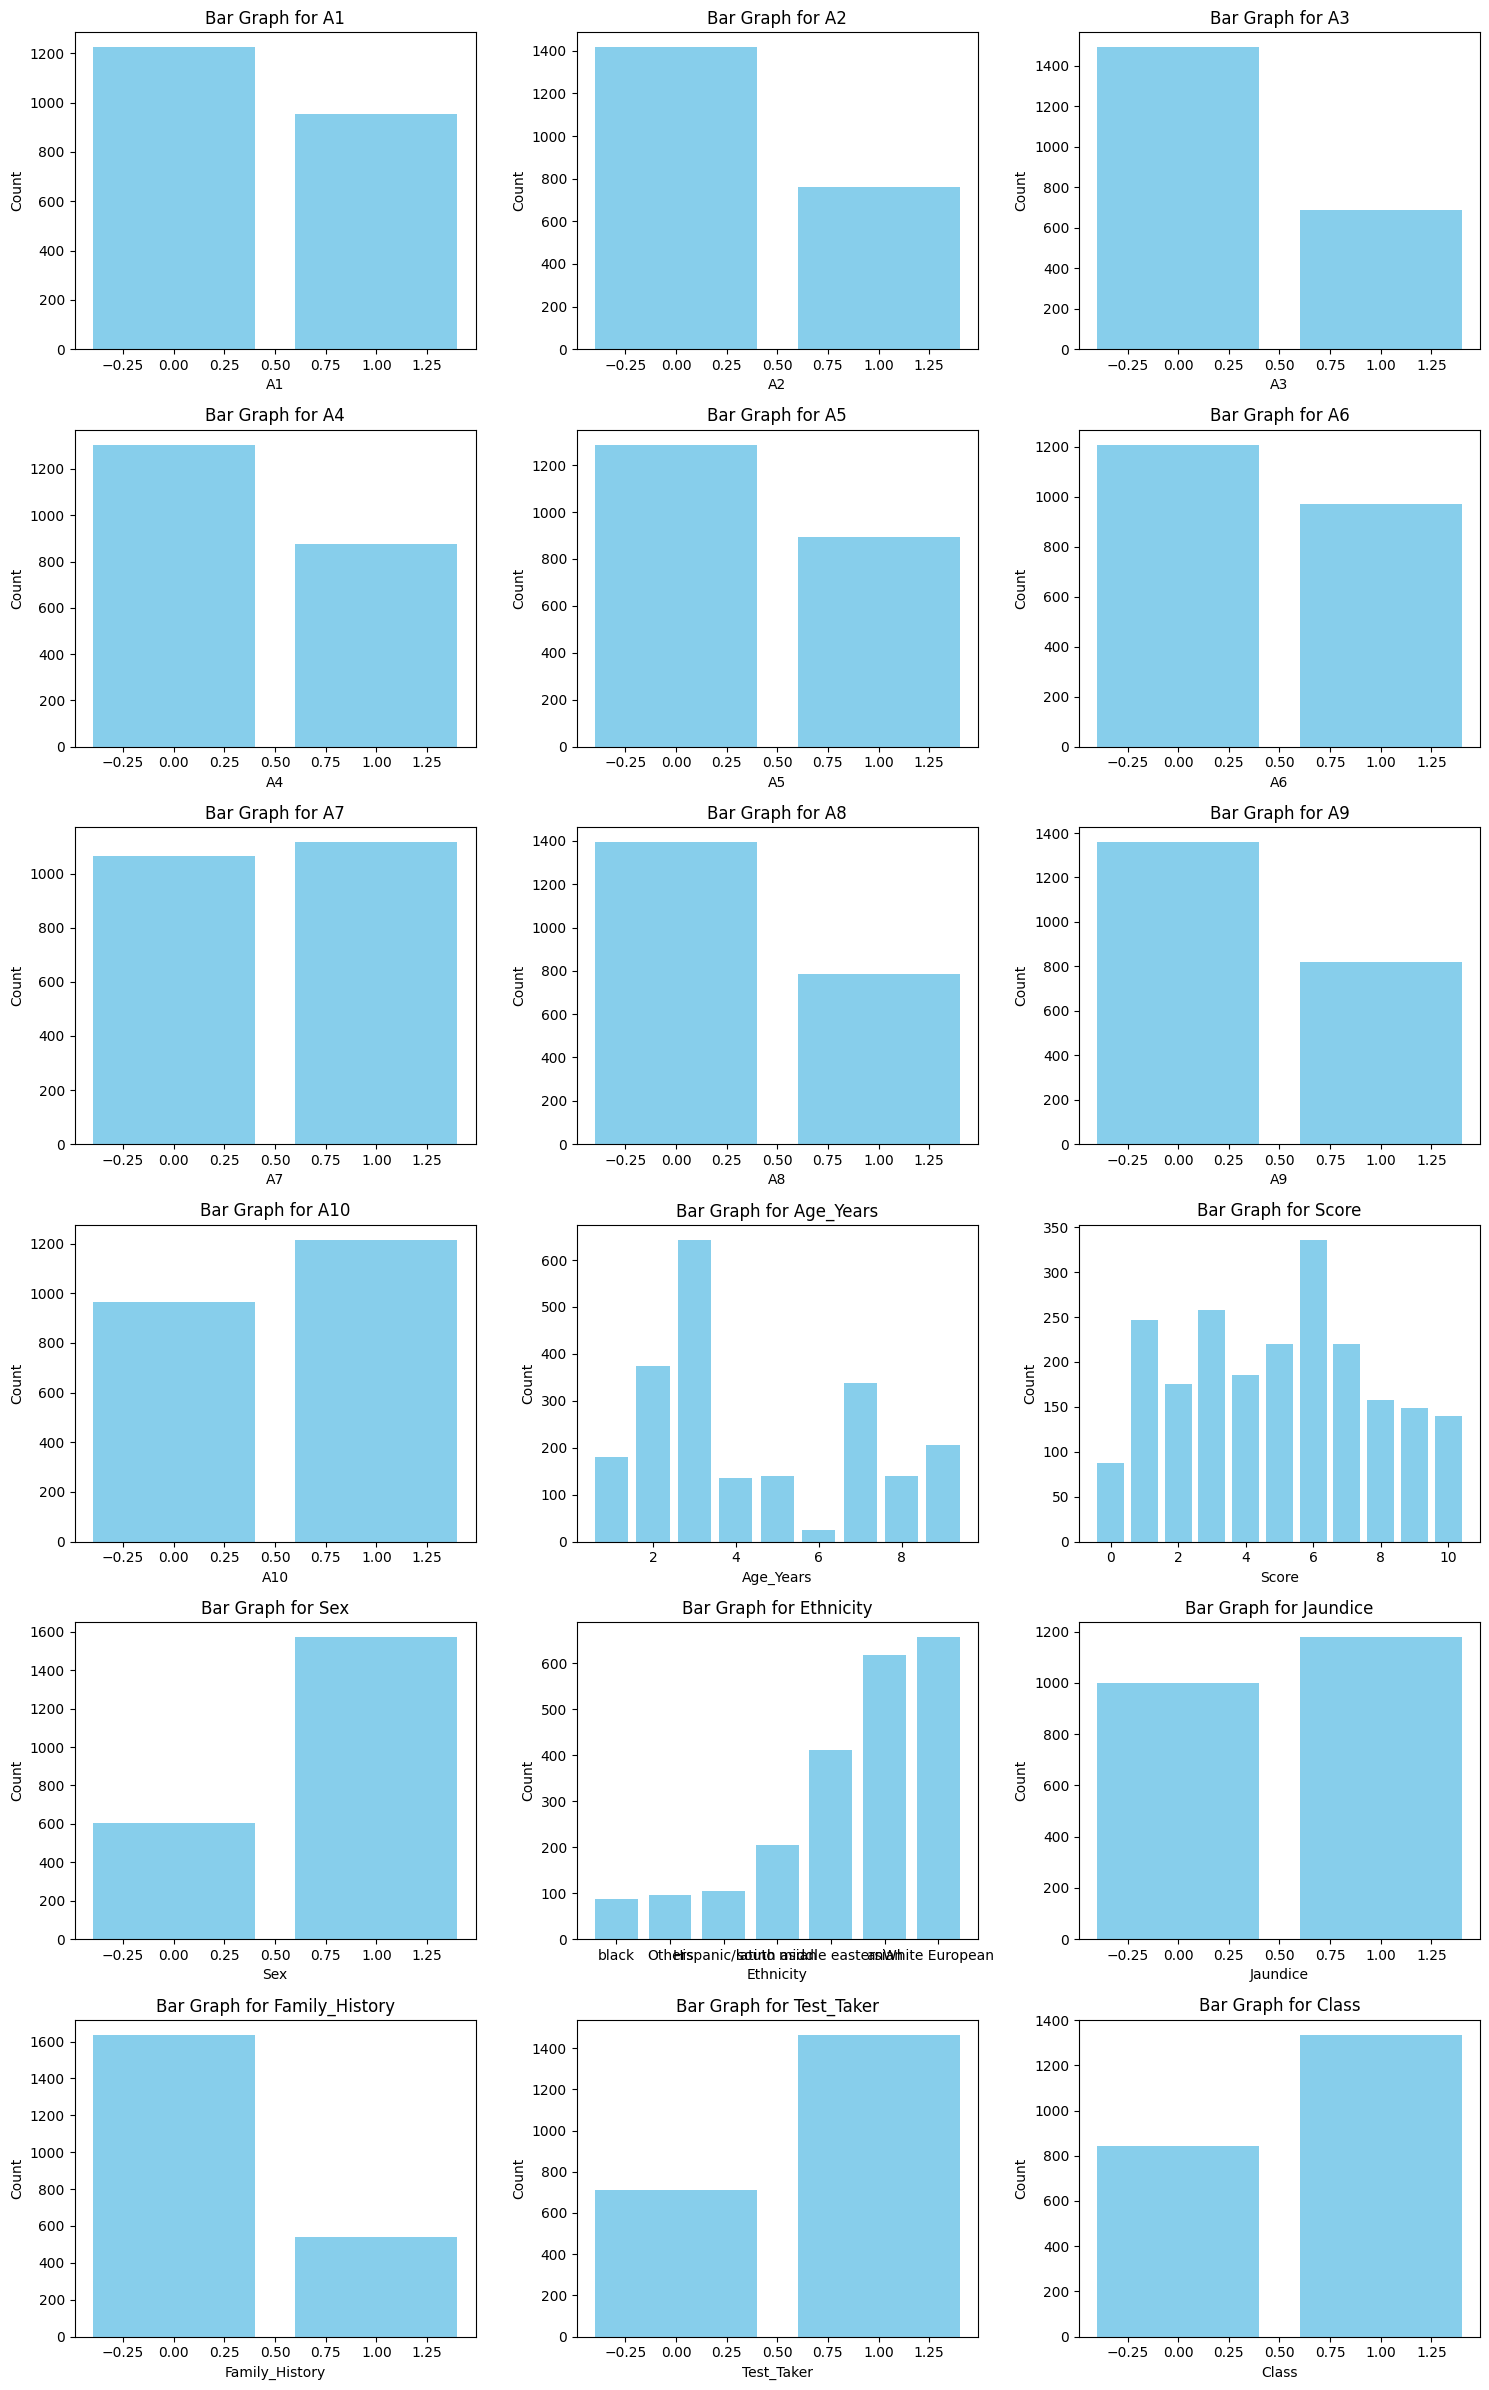

<Figure size 640x480 with 0 Axes>

In [ ]:
# PLot for class priors
plots_per_row = 3
num_rows = math.ceil(len(df_1.columns) / plots_per_row)
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 4 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(df_1.columns):
    value_counts_sorted = df_1[column_name].value_counts().sort_values()
    axes[i].bar(value_counts_sorted.index, value_counts_sorted, color='skyblue')
    axes[i].set_title(f'Bar Graph for {column_name}')
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()
plt.savefig("abc.png",dpi=1000)
#finally .show() or .draw() it in this order
plt.draw()

class vs score

<Axes: xlabel='Qchat-10-Score'>

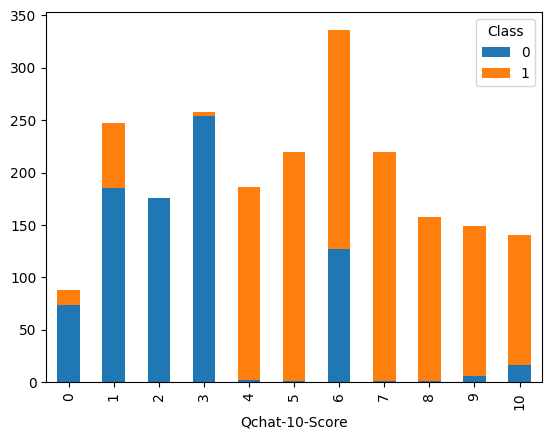

In [ ]:
pd.crosstab(df_1['Qchat-10-Score'], df_1['Class']).plot(kind='bar', stacked=True)

Class vs Sex

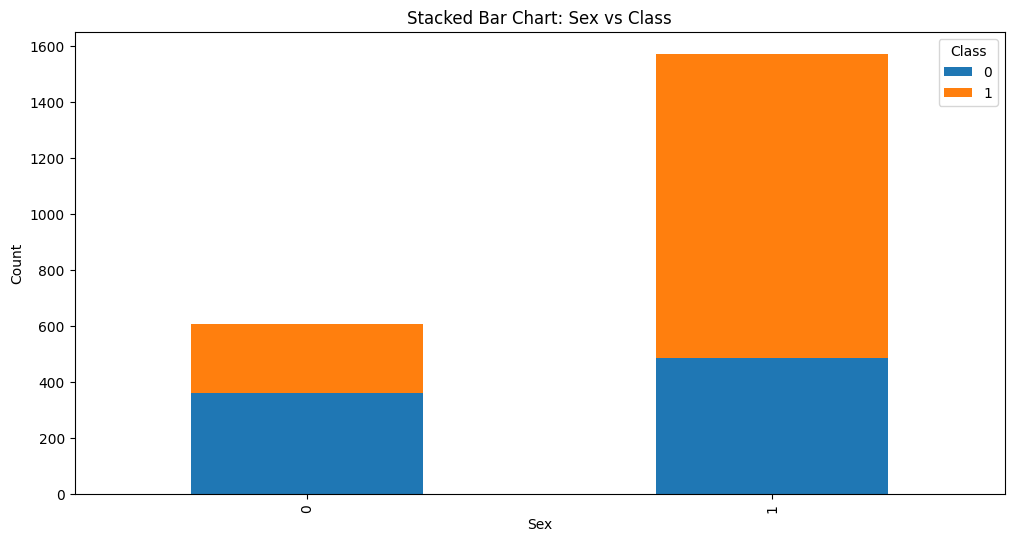

In [ ]:
cross_tab = pd.crosstab(df_1['Sex'], df_1['Class'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart: Sex vs Class')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Class vs Ethnicity

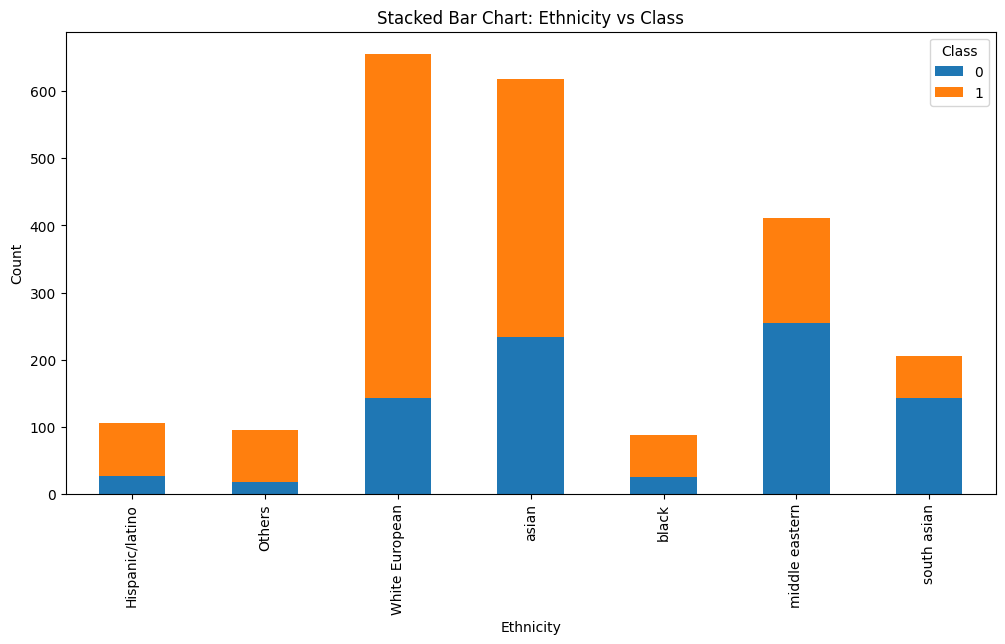

In [ ]:
cross_tab = pd.crosstab(df_1['Ethnicity'], df_1['Class'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart: Ethnicity vs Class')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

Class vs Jaundice

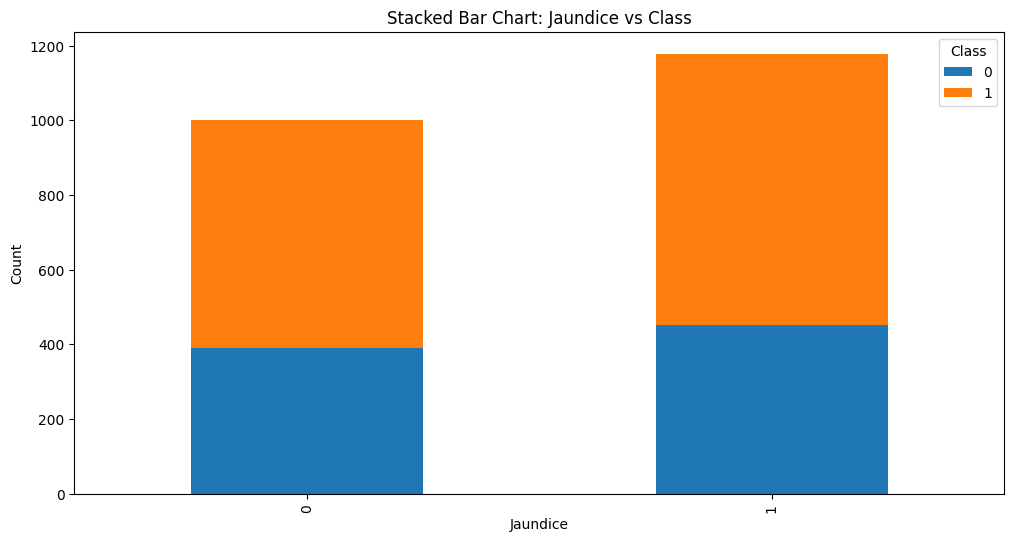

In [ ]:
cross_tab = pd.crosstab(df_1['Jaundice'], df_1['Class'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart: Jaundice vs Class')
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.show()

Class vs Family member with ASD

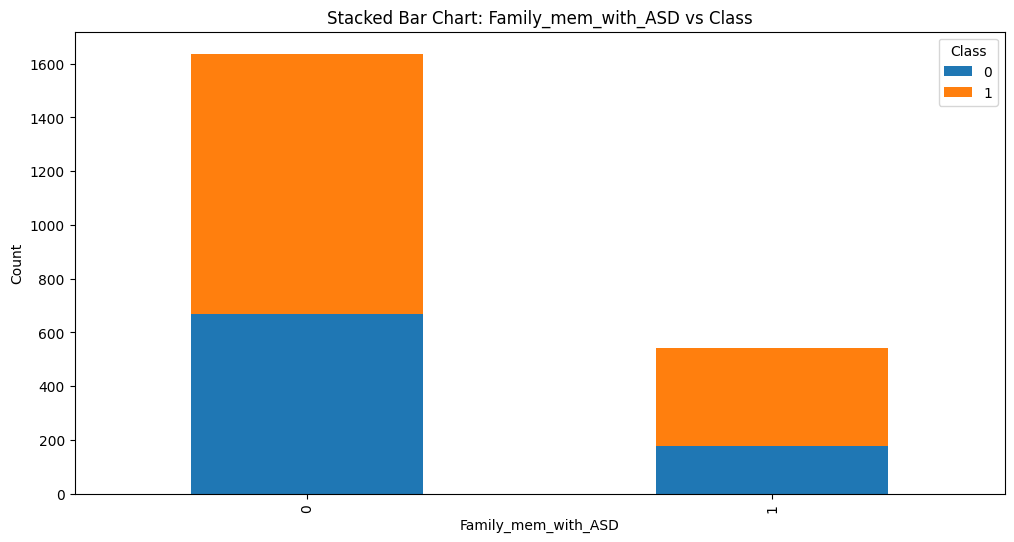

In [ ]:
cross_tab = pd.crosstab(df_1['Family_mem_with_ASD'], df_1['Class'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart: Family_mem_with_ASD vs Class')
plt.xlabel('Family_mem_with_ASD')
plt.ylabel('Count')
plt.show()

Age in years Vs Class

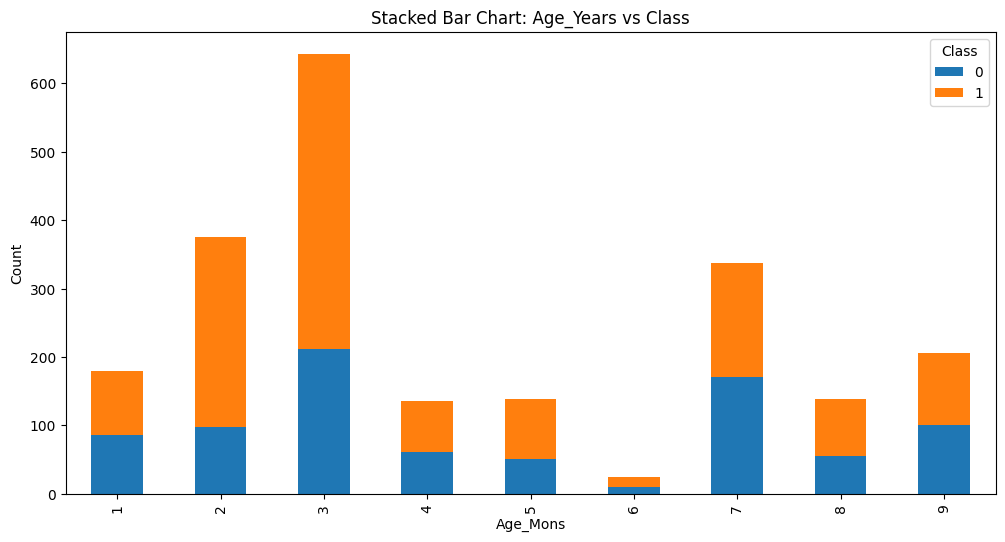

In [ ]:
cross_tab = pd.crosstab(df_1['Age_Years'], df_1['Class'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart: Age_Years vs Class')
plt.xlabel('Age_Mons')
plt.ylabel('Count')
plt.show()

# Feature Engineering

In [ ]:
# Changing column names

In [ ]:
new_column_names = {
    'Age_Mons' : 'Age' ,
    'Qchat-10-Score': 'Score',
    'Family_mem_with_ASD': 'Family_History',
    'Who completed the test': 'Test_Taker'
}

In [ ]:
df_1 = df_1.rename(columns=new_column_names)

In [ ]:
df_1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Score,Sex,Ethnicity,Jaundice,Family_History,Test_Taker,Class
0,0,0,0,0,0,0,1,1,0,1,2,3,0,middle eastern,1,0,1,0
1,1,1,0,0,0,1,1,0,0,0,3,4,1,White European,1,0,1,1
2,1,0,0,0,0,0,1,1,0,1,3,4,1,middle eastern,1,0,1,1
3,1,1,1,1,1,1,1,1,1,1,2,10,1,Hispanic/latino,0,0,1,1
4,1,1,0,1,1,1,1,1,1,1,2,9,0,White European,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1,1,1,1,1,1,1,1,1,1,9,10,1,south asian,1,1,0,1
2174,1,1,1,1,1,1,1,1,1,1,9,10,1,White European,1,1,0,1
2175,1,1,1,1,1,1,1,1,1,1,9,10,1,black,1,1,0,1
2176,1,1,1,1,1,1,1,1,1,1,9,10,0,White European,1,0,0,1


In [ ]:
# Pearson correlation

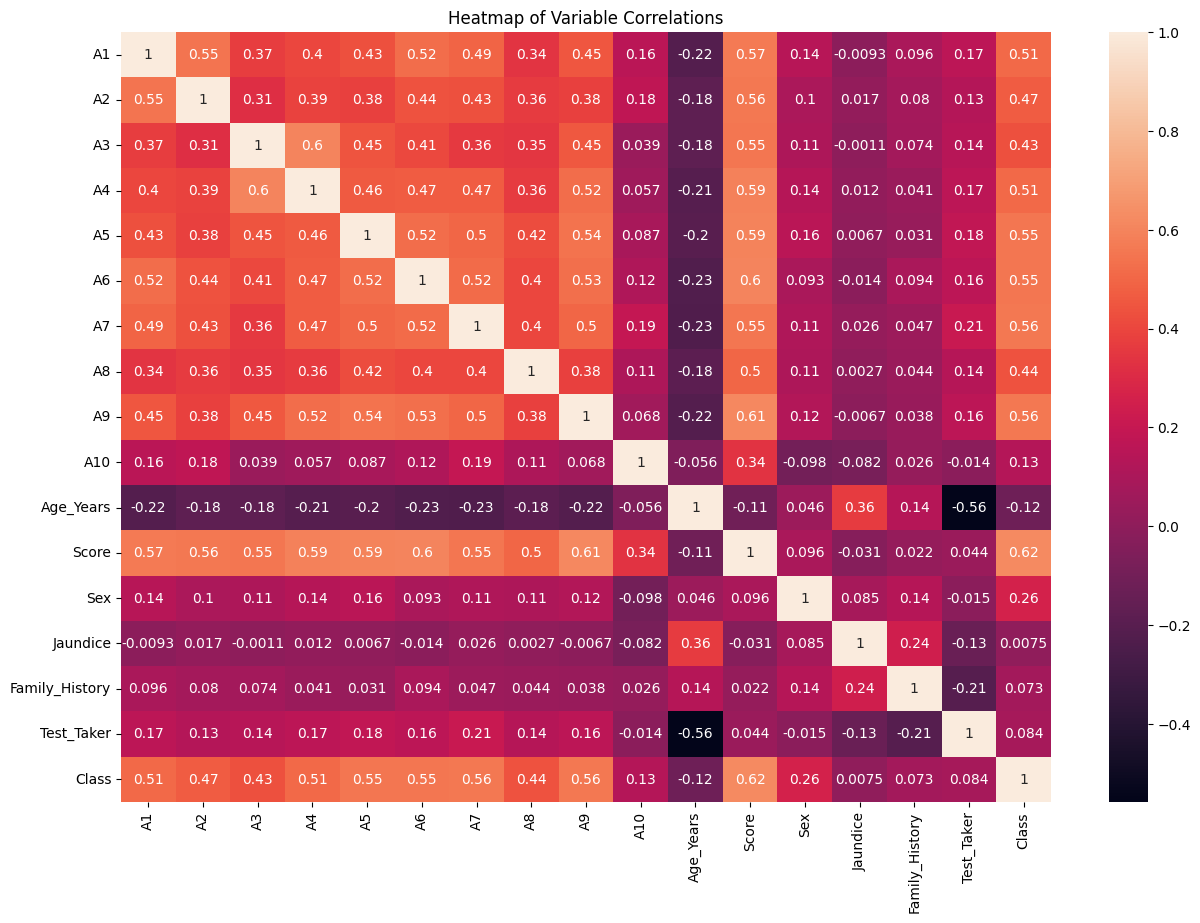

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_1.drop('Ethnicity',axis=1).corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

 Removing above features from data frame

In [ ]:
df_2 = df_1.drop(['Jaundice','Test_Taker'],axis=1)

In [ ]:
df_2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Score,Sex,Ethnicity,Family_History,Class
0,0,0,0,0,0,0,1,1,0,1,2,3,0,middle eastern,0,0
1,1,1,0,0,0,1,1,0,0,0,3,4,1,White European,0,1
2,1,0,0,0,0,0,1,1,0,1,3,4,1,middle eastern,0,1
3,1,1,1,1,1,1,1,1,1,1,2,10,1,Hispanic/latino,0,1
4,1,1,0,1,1,1,1,1,1,1,2,9,0,White European,1,1


Feature Encoding

In [ ]:
df_3 = pd.get_dummies(df_2, columns=['Ethnicity'],drop_first=True)

In [ ]:
df_3.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Score,Sex,Family_History,Class,Ethnicity_Others,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_south asian
0,0,0,0,0,0,0,1,1,0,1,...,3,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,1,1,0,0,0,...,4,1,0,1,0,1,0,0,0,0
2,1,0,0,0,0,0,1,1,0,1,...,4,1,0,1,0,0,0,0,1,0
3,1,1,1,1,1,1,1,1,1,1,...,10,1,0,1,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,...,9,0,1,1,0,1,0,0,0,0


In [ ]:
df_3.dtypes

A1                          int64
A2                          int64
A3                          int64
A4                          int64
A5                          int64
A6                          int64
A7                          int64
A8                          int64
A9                          int64
A10                         int64
Age_Years                   int64
Score                       int64
Sex                         int64
Family_History              int64
Class                       int64
Ethnicity_Others            uint8
Ethnicity_White European    uint8
Ethnicity_asian             uint8
Ethnicity_black             uint8
Ethnicity_middle eastern    uint8
Ethnicity_south asian       uint8
dtype: object

All the features are in numbers foramat and are ready to be passed to the next steps

### Dataset splitting

In [ ]:
X = df_3.drop('Class',axis=1)
y = df_3['Class']
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Score,Sex,Family_History,Ethnicity_Others,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_south asian
1245,0,0,0,0,0,0,0,0,0,0,9,1,1,0,0,1,0,0,0,0
256,1,0,1,1,1,0,1,1,1,1,3,8,1,1,0,1,0,0,0,0
1480,0,0,0,0,0,0,0,0,0,0,9,3,1,0,0,0,0,0,1,0
1165,0,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,1,0,0,0
990,1,0,1,1,1,1,1,0,1,1,3,8,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,1,0,0,0,1,0,1,0,1,8,5,1,1,0,1,0,0,0,0
1095,0,0,0,0,0,0,0,0,0,1,2,1,1,1,0,0,0,0,1,0
1130,0,0,0,0,0,0,1,0,0,0,5,1,1,1,0,0,0,0,0,0
1294,0,0,1,0,0,0,0,0,0,1,7,2,1,1,0,0,0,0,1,0


In [ ]:
X_train1.dtypes

A1                          int64
A2                          int64
A3                          int64
A4                          int64
A5                          int64
A6                          int64
A7                          int64
A8                          int64
A9                          int64
A10                         int64
Age_Years                   int64
Score                       int64
Sex                         int64
Family_History              int64
Ethnicity_Others            uint8
Ethnicity_White European    uint8
Ethnicity_asian             uint8
Ethnicity_black             uint8
Ethnicity_middle eastern    uint8
Ethnicity_south asian       uint8
dtype: object

# Data Upsampling

In [ ]:
y_train1.value_counts()

1    1063
0     679
Name: Class, dtype: int64

## Smote

In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train1, y_train1)

In [ ]:
df_resampled = pd.DataFrame(X_train_resampled, columns=X_train1.columns)
df_resampled['Class'] = y_train_resampled
df_resampled['Class'].value_counts()

1    1063
0    1063
Name: Class, dtype: int64

### Random Sampling with Replacement

In [ ]:
target_rows = 2500
synthetic_rows_needed = target_rows - len(df_resampled)
synthetic_data = df_resampled.sample(n=synthetic_rows_needed, replace=True, random_state=42)
df_final = pd.concat([df_resampled, synthetic_data], ignore_index=True)

In [ ]:
df_final['Class'].value_counts()

1    1251
0    1249
Name: Class, dtype: int64

In [ ]:
df_final.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Score,Sex,Family_History,Ethnicity_Others,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_south asian,Class
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
1,1,0,1,1,1,0,1,1,1,1,...,8,1,1,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,3,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,1,1,1,1,1,0,1,1,...,8,0,0,0,0,0,0,1,0,1
5,0,0,0,0,0,0,0,0,0,1,...,6,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,3,1,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0,0,1,...,2,1,1,0,1,0,0,0,0,0
8,1,0,0,0,1,1,1,0,1,0,...,5,1,1,0,0,1,0,0,0,1
9,1,0,0,1,1,1,1,1,1,0,...,7,1,0,0,0,0,0,1,0,1


Final X_train and y_train from df_final

In [ ]:
X_train = df_final.drop('Class',axis=1)
y_train = df_final['Class']

In [ ]:
X_train.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Score,Sex,Family_History,Ethnicity_Others,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_south asian
0,0,0,0,0,0,0,0,0,0,0,9,1,1,0,0,1,0,0,0,0
1,1,0,1,1,1,0,1,1,1,1,3,8,1,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,9,3,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,1,0,0,0
4,1,0,1,1,1,1,1,0,1,1,3,8,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,1,5,6,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,7,3,1,0,0,0,0,0,1,0
7,0,0,0,0,0,0,1,0,0,1,3,2,1,1,0,1,0,0,0,0
8,1,0,0,0,1,1,1,0,1,0,6,5,1,1,0,0,1,0,0,0
9,1,0,0,1,1,1,1,1,1,0,3,7,1,0,0,0,0,0,1,0


In [ ]:
y_train.head()

0    1
1    1
2    0
3    0
4    1
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score , recall_score,f1_score,matthews_corrcoef

#Function to compute accuracy for Train datasets using Cross Validation and LeaveOneOut

def fold_accuracies(X,y,model):
  strtfdKFold = StratifiedKFold(n_splits=5)
  kfold = strtfdKFold.split(X, y)
  st_scores = []
  for k, (train, test) in enumerate(kfold):
    model.fit(X.iloc[train, :], y.iloc[train])
    score = model.score(X.iloc[test, :], y.iloc[test])
    st_scores.append(score)
    #print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
  print('\n\nStartified Cross-Validation accuracy for 5-fold: %.3f +/- %.3f' %(np.mean(st_scores), np.std(st_scores)))
  stsc = np.mean(st_scores)

  scores = cross_val_score(model, X=X, y=y, cv=5, n_jobs=1)
  #print('Cross Validation accuracy scores: %s' % scores)
  print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
  cvsc = np.mean(scores)

  loo = LeaveOneOut()
  loo_scores = cross_val_score(model, X=X, y=y, cv=loo, n_jobs=1)
  #print('Cross Validation accuracy scores LeaveOneOut: %s' % scores)
  print('Cross Validation accuracy LeaveOneOut: %.3f +/- %.3f' % (np.mean(loo_scores),np.std(loo_scores)))
  lsc = np.mean(loo_scores)

  return stsc,cvsc,lsc

Intializing a Data Frame to store the metrics

In [ ]:
metrics = ['Model','Stratified cv Accuracy','Cross Validation Accuracy','Leave One Out cv accuracy','Test Accuracy','Precision','Recall','F1-Score','MCC']
evaluation  = pd.DataFrame(columns = metrics)

##Models

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
stsc,cvsc,lsc = fold_accuracies(X_train,y_train,logreg_model)

evaluation = pd.concat([evaluation, pd.DataFrame.from_records([{'Model': 'Logistic Regression', 'Stratified cv Accuracy':stsc,
                                                                'Cross Validation Accuracy':cvsc,'Leave One Out cv accuracy':lsc,
                                                                'Test Accuracy':accuracy,'Precision':precision,'Recall':recall,
                                                                'F1-Score':f1,'MCC':mcc}])])

# Display results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)




Startified Cross-Validation accuracy for 5-fold: 0.908 +/- 0.016
Cross Validation accuracy: 0.908 +/- 0.016


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation accuracy LeaveOneOut: 0.908 +/- 0.290
Accuracy: 0.8990825688073395

Confusion Matrix:
[[144  20]
 [ 24 248]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       164
           1       0.93      0.91      0.92       272

    accuracy                           0.90       436
   macro avg       0.89      0.89      0.89       436
weighted avg       0.90      0.90      0.90       436



In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = NB_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
stsc,cvsc,lsc = fold_accuracies(X_train,y_train,NB_model)

evaluation = pd.concat([evaluation, pd.DataFrame.from_records([{'Model': 'Naive Bayes', 'Stratified cv Accuracy':stsc,
                                                                'Cross Validation Accuracy':cvsc,'Leave One Out cv accuracy':lsc,
                                                                'Test Accuracy':accuracy,'Precision':precision,'Recall':recall,
                                                                'F1-Score':f1,'MCC':mcc}])])

# Display results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)



Startified Cross-Validation accuracy for 5-fold: 0.877 +/- 0.028
Cross Validation accuracy: 0.877 +/- 0.028
Cross Validation accuracy LeaveOneOut: 0.880 +/- 0.325
Accuracy: 0.8715596330275229

Confusion Matrix:
[[137  27]
 [ 29 243]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       164
           1       0.90      0.89      0.90       272

    accuracy                           0.87       436
   macro avg       0.86      0.86      0.86       436
weighted avg       0.87      0.87      0.87       436



In [ ]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', random_state = 0,probability=True)
SVM.fit(X_train, y_train)

# Make predictions on the test set
y_pred = SVM.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
stsc,cvsc,lsc = fold_accuracies(X_train,y_train,SVM)

evaluation = pd.concat([evaluation, pd.DataFrame.from_records([{'Model': 'SVM', 'Stratified cv Accuracy':stsc,
                                                                'Cross Validation Accuracy':cvsc,'Leave One Out cv accuracy':lsc,
                                                                'Test Accuracy':accuracy,'Precision':precision,'Recall':recall,
                                                                'F1-Score':f1,'MCC':mcc}])])

# Display results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)





Startified Cross-Validation accuracy for 5-fold: 0.956 +/- 0.009
Cross Validation accuracy: 0.956 +/- 0.009
Cross Validation accuracy LeaveOneOut: 0.956 +/- 0.205
Accuracy: 0.9426605504587156

Confusion Matrix:
[[157   7]
 [ 18 254]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       164
           1       0.97      0.93      0.95       272

    accuracy                           0.94       436
   macro avg       0.94      0.95      0.94       436
weighted avg       0.94      0.94      0.94       436



In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier_rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
stsc,cvsc,lsc = fold_accuracies(X_train,y_train,classifier_rf)

evaluation = pd.concat([evaluation, pd.DataFrame.from_records([{'Model': 'Random Forest', 'Stratified cv Accuracy':stsc,
                                                                'Cross Validation Accuracy':cvsc,'Leave One Out cv accuracy':lsc,
                                                                'Test Accuracy':accuracy,'Precision':precision,'Recall':recall,
                                                                'F1-Score':f1,'MCC':mcc}])])

# Display results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)



Startified Cross-Validation accuracy for 5-fold: 0.958 +/- 0.004
Cross Validation accuracy: 0.958 +/- 0.004
Cross Validation accuracy LeaveOneOut: 0.952 +/- 0.214
Accuracy: 0.944954128440367

Confusion Matrix:
[[164   0]
 [ 24 248]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       164
           1       1.00      0.91      0.95       272

    accuracy                           0.94       436
   macro avg       0.94      0.96      0.94       436
weighted avg       0.95      0.94      0.95       436



In [ ]:
!sudo pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
stsc,cvsc,lsc = fold_accuracies(X_train,y_train,xgb_model)

evaluation = pd.concat([evaluation, pd.DataFrame.from_records([{'Model': 'XGBoost', 'Stratified cv Accuracy':stsc,
                                                                'Cross Validation Accuracy':cvsc,'Leave One Out cv accuracy':lsc,
                                                                'Test Accuracy':accuracy,'Precision':precision,'Recall':recall,
                                                                'F1-Score':f1,'MCC':mcc}])])

# Display results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)



Startified Cross-Validation accuracy for 5-fold: 0.992 +/- 0.004
Cross Validation accuracy: 0.992 +/- 0.004
Cross Validation accuracy LeaveOneOut: 0.992 +/- 0.089
Accuracy: 0.9793577981651376

Confusion Matrix:
[[161   3]
 [  6 266]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       164
           1       0.99      0.98      0.98       272

    accuracy                           0.98       436
   macro avg       0.98      0.98      0.98       436
weighted avg       0.98      0.98      0.98       436



In [ ]:
evaluation

,Model,Stratified cv Accuracy,Cross Validation Accuracy,Leave One Out cv accuracy,Test Accuracy,Precision,Recall,F1-Score,MCC
0,Logistic Regression,0.9084,0.9084,0.9076,0.899083,0.925373,0.911765,0.918519,0.786156
0,Naive Bayes,0.8768,0.8768,0.8796,0.871560,0.900000,0.893382,0.896679,0.727023
0,Naive Bayes,0.8768,0.8768,0.8796,0.871560,0.900000,0.893382,0.896679,0.727023
0,SVM,0.9564,0.9564,0.9560,0.942661,0.973180,0.933824,0.953096,0.880670
0,Random Forest,0.9584,0.9584,0.9520,0.944954,1.000000,0.911765,0.953846,0.891835
0,XGBoost,0.9920,0.9920,0.9920,0.979358,0.988848,0.977941,0.983364,0.956278


In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset


# define the keras model
model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# Make predictions on the test set
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
stsc,cvsc,lsc = 'NA','NA','NA'

evaluation = pd.concat([evaluation, pd.DataFrame.from_records([{'Model': 'NN', 'Stratified cv Accuracy':stsc,
                                                                'Cross Validation Accuracy':cvsc,'Leave One Out cv accuracy':lsc,
                                                                'Test Accuracy':accuracy,'Precision':precision,'Recall':recall,
                                                               'F1-Score':f1,'MCC':mcc}])])

14/14 [==============================] - 0s 3ms/step


14/14 [==============================] - 0s 3ms/step


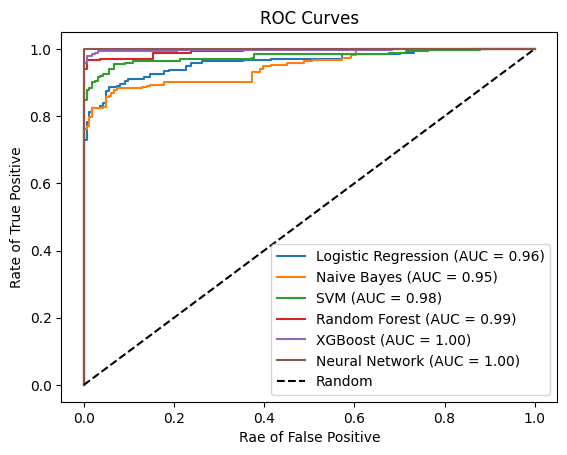

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Make predictions on the test set for all the models
LR_pred = logreg_model.predict_proba(X_test)[:, 1]
NB_pred = NB_model.predict_proba(X_test)[:, 1]
SVM_pred = SVM.predict_proba(X_test)[:,1]
classifier_rf_pred = classifier_rf.predict_proba(X_test)[:,1]
xgb_model_pred = xgb_model.predict_proba(X_test)[:,1]
nn_pred = model.predict(X_test)

# False positive rate and True positive rate computation for all the models
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_pred)
NB_fpr, NB_tpr, _ = roc_curve(y_test, NB_pred)
SVM_fpr,SVM_tpr,_ = roc_curve(y_test,SVM_pred)
rf_fpr,rf_tpr,_ = roc_curve(y_test,classifier_rf_pred)
xgb_fpr,xgb_tpr,_ = roc_curve(y_test,xgb_model_pred)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_pred)

#AUC computation
LR_roc_auc = auc(LR_fpr, LR_tpr)
NB_roc_auc = auc(NB_fpr, NB_tpr)
SVM_roc_auc = auc(SVM_fpr,SVM_tpr)
rf_roc_auc = auc(rf_fpr,rf_tpr)
xgb_roc_auc = auc(xgb_fpr,xgb_tpr)
nn_roc_auc = auc(nn_fpr, nn_tpr)


#Plotting ROC curves for all the models
plt.plot(LR_fpr, LR_tpr, label=f'Logistic Regression (AUC = {LR_roc_auc:.2f})')
plt.plot(NB_fpr, NB_tpr, label=f'Naive Bayes (AUC = {NB_roc_auc:.2f})')
plt.plot(SVM_fpr,SVM_tpr, label=f'SVM (AUC = {SVM_roc_auc:.2f})')
plt.plot(rf_fpr,rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot(xgb_fpr,xgb_tpr, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')
plt.plot(nn_fpr,nn_tpr, label=f'Neural Network (AUC = {nn_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Rae of False Positive')
plt.ylabel('Rate of True Positive')
plt.title('ROC Curves')
plt.legend()
plt.show()


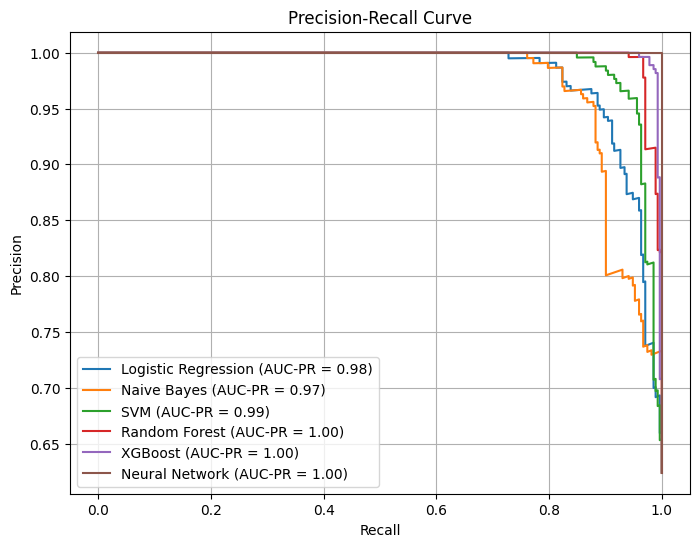

In [ ]:
# Import necessary libraries
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


LR_pr, LR_r, _ = precision_recall_curve(y_test, LR_pred)
NB_pr, NB_r, _ = precision_recall_curve(y_test, NB_pred)
SVM_pr,SVM_r,_ = precision_recall_curve(y_test,SVM_pred)
rf_pr,rf_r,_ = precision_recall_curve(y_test,classifier_rf_pred)
xgb_pr,xgb_r,_ = precision_recall_curve(y_test,xgb_model_pred)
nn_pr,nn_r,_ = precision_recall_curve(y_test,nn_pred)

# Compute the area under the precision-recall curve (AUC-PR)

LR_pr_auc = average_precision_score(y_test, LR_pred)
NB_pr_auc = average_precision_score(y_test, NB_pred)
SVM_pr_auc = average_precision_score(y_test,SVM_pred)
rf_pr_auc = average_precision_score(y_test,classifier_rf_pred)
xgb_pr_auc = average_precision_score(y_test,xgb_model_pred)
nn_pr_auc = average_precision_score(y_test,nn_pred)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(LR_r, LR_pr, label=f'Logistic Regression (AUC-PR = {LR_pr_auc:.2f})')
plt.plot(NB_r, NB_pr, label=f'Naive Bayes (AUC-PR = {NB_pr_auc:.2f})')
plt.plot(SVM_r,SVM_pr, label=f'SVM (AUC-PR = {SVM_pr_auc:.2f})')
plt.plot(rf_r,rf_pr, label=f'Random Forest (AUC-PR = {rf_pr_auc:.2f})')
plt.plot(xgb_r,xgb_pr, label=f'XGBoost (AUC-PR = {xgb_pr_auc:.2f})')
plt.plot(nn_r,nn_pr, label=f'Neural Network (AUC-PR = {nn_pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
ev1 = evaluation.iloc[:,[0,2,3]]
ev1

,Model,Cross Validation Accuracy,Leave One Out cv accuracy
0,Logistic Regression,0.9084,0.9076
0,Naive Bayes,0.8768,0.8796
0,Naive Bayes,0.8768,0.8796
0,SVM,0.9564,0.956
0,Random Forest,0.9584,0.952
0,XGBoost,0.992,0.992
0,NN,NA,NA


In [ ]:
ev2 = evaluation.iloc[:,[0,4,5,6,7,8]]
ev2

,Model,Test Accuracy,Precision,Recall,F1-Score,MCC
0,Logistic Regression,0.899083,0.925373,0.911765,0.918519,0.786156
0,Naive Bayes,0.871560,0.900000,0.893382,0.896679,0.727023
0,Naive Bayes,0.871560,0.900000,0.893382,0.896679,0.727023
0,SVM,0.942661,0.973180,0.933824,0.953096,0.880670
0,Random Forest,0.944954,1.000000,0.911765,0.953846,0.891835
0,XGBoost,0.979358,0.988848,0.977941,0.983364,0.956278
0,NN,0.990826,1.000000,0.985294,0.992593,0.980732


In [ ]:
params_lr = logreg_model.get_params()
params_nb = NB_model.get_params()
params_rf = classifier_rf.get_params()
params_svm = SVM.get_params()
params_xgb = xgb_model.get_params()
params_nn = model.history

In [ ]:
params_lr

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params_nb

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
params_svm

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
params_rf

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params_xgb

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
X_test_random = X_test.sample(10)
X_test_random

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Score,Sex,Family_History,Ethnicity_Others,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_south asian
2082,1,1,1,1,1,1,1,0,1,1,5,9,1,0,0,1,0,0,0,0
1687,0,0,0,0,0,0,0,0,0,1,3,6,0,0,0,0,0,0,0,1
596,0,0,0,0,0,1,0,0,0,1,3,2,1,1,0,1,0,0,0,0
1608,0,0,0,0,0,0,0,0,0,0,5,5,1,0,0,1,0,0,0,0
1541,0,1,0,1,0,1,0,0,1,0,7,4,1,1,0,0,1,0,0,0
907,1,1,1,1,1,1,1,1,1,1,2,10,1,0,0,0,1,0,0,0
618,1,1,0,1,1,1,1,1,1,0,2,8,1,0,0,0,1,0,0,0
1352,0,0,0,0,0,0,0,0,0,0,3,3,1,0,0,0,0,0,1,0
1358,1,0,1,0,0,1,0,0,0,0,4,3,1,1,0,0,1,0,0,0
636,1,0,0,0,0,0,0,0,0,1,3,2,0,0,0,0,0,0,1,0


In [ ]:
indices_list = X_test_random.index.tolist()
Y_True = y_test.loc[indices_list] # to fetch the respective true values of X test data

In [ ]:
y_pred_random = xgb_model.predict(X_test_random)
y_pred_random.tolist()

[1, 0, 0, 1, 1, 1, 1, 0, 0, 0]

In [ ]:
Y_True.tolist()

[1, 0, 0, 1, 1, 1, 1, 0, 0, 0]

In [ ]:
predictions = pd.DataFrame({'True values': Y_True.tolist() ,
                    'Predicted values': y_pred_random.tolist()})

predictions #to store true and predicted values for inference

,True values,Predicted values
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,0,0
8,0,0
9,0,0


In [ ]:
X_test_random.to_csv('file1.csv')